# Task 1

# 1.Import required Libraries.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# 2.Read and prepare the wine dataset.

In [146]:
from sklearn.datasets import load_wine
df=load_wine()
x=df.data
y=df.target

In [147]:
df=pd.DataFrame(data=np.c_[df['data'],df['target']],columns=df['feature_names']+['target'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [111]:
df.shape

(178, 14)

In [112]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [114]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [115]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [116]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


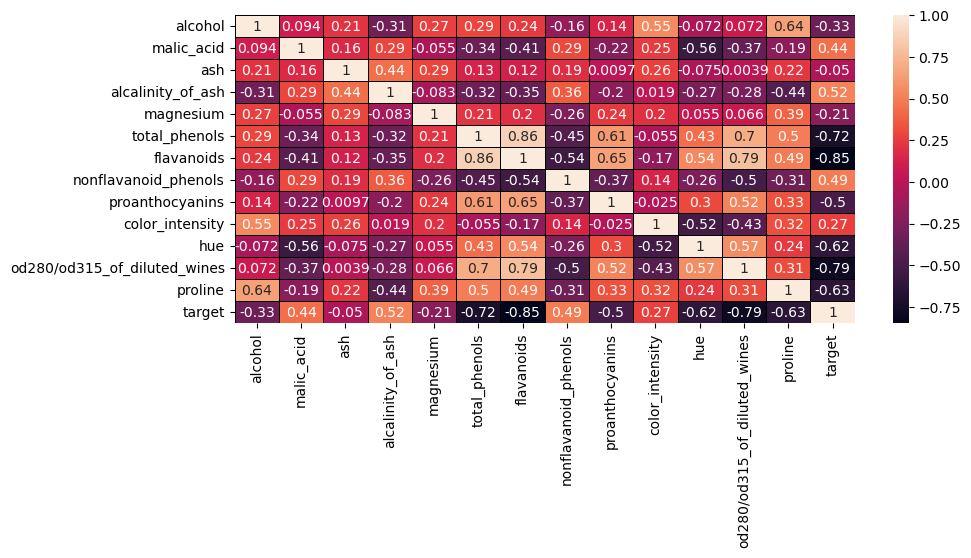

In [117]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='k',linewidths=.5);

In [160]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=scale.fit_transform(df)
df1=pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


# Task 2

# 1.Apply the learned dimension reduction algorithms.

In [119]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
pc_data1=pca.fit(df1)
pc_data1

PCA(n_components=14)

In [120]:
sum(pc_data1.explained_variance_ratio_)

1.0

In [124]:
var_ratio={}
for i in range (2,19):
    pca=PCA(n_components=i)
    pc_data1=pca.fit(df1)
    var_ratio[i]=sum(pc_data1.explained_variance_ratio_)   

ValueError: n_components=15 must be between 0 and min(n_samples, n_features)=14 with svd_solver='full'

In [125]:
var_ratio

{2: 0.5737874490085586,
 3: 0.6770784649085955,
 4: 0.743358309776332,
 5: 0.8060370610547871,
 6: 0.8540926568319017,
 7: 0.8936497252567083,
 8: 0.9186521659731063,
 9: 0.9396908760725872,
 10: 0.958427025994762,
 11: 0.974559056089481,
 12: 0.9866159643311618,
 13: 0.9958705485261241,
 14: 1.0}

<AxesSubplot:>

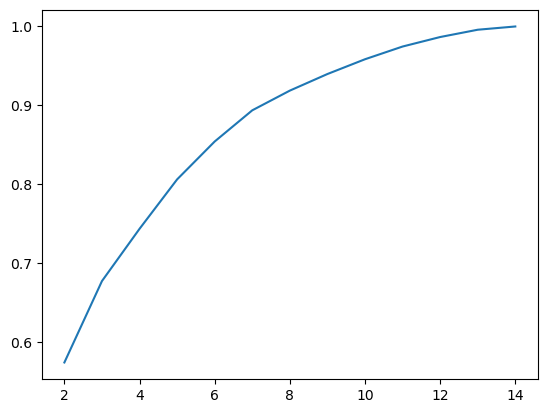

In [126]:
pd.Series(var_ratio).plot(kind='line')

The good k value is 6.

In [127]:
pca=PCA(n_components=6)
pc_data1=pca.fit(df1)
pc_data2=pca.fit_transform(df1)

In [128]:
df2=pd.DataFrame(pc_data2) #After Dimension reduction
df2

,0,1,2,3,4,5
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562


In [129]:
sum(pc_data1.explained_variance_ratio_)

0.8540926568319017

# LDA

In [130]:
df3=load_wine()
x=df3.data
y=df3.target

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda_data1=lda.fit(x,y)
lda_data2=lda.fit_transform(x,y)


In [132]:
lda_data1.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [133]:
sum(lda_data1.explained_variance_ratio_)

0.9999999999999999

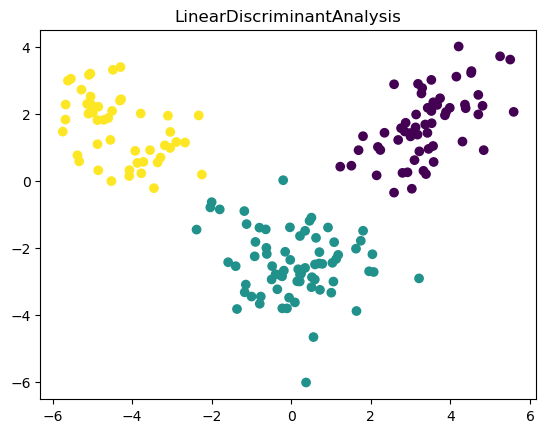

In [197]:
plt.scatter(lda_data2[:,0],lda_data2[:,1],c=y)
plt.title('LinearDiscriminantAnalysis');

# 2.Determine the most appropriate method for the dataset.

PCA(Principal component Analysis) is the most appropriate method for the dataset.

# Task 3

# Apply the K-means clustering algorithm to the prepared model and compare the performances of the model with and method with and without dimension reduced data.

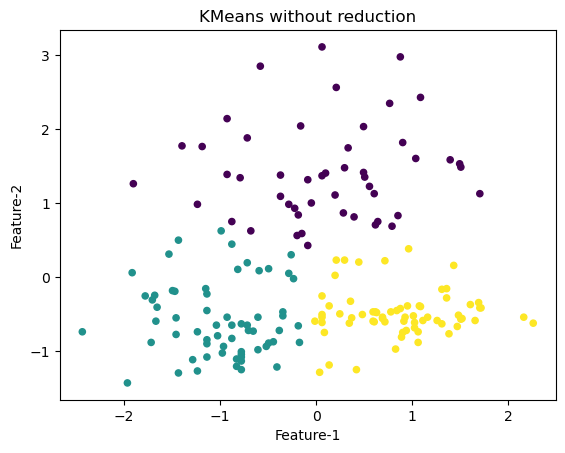

In [165]:
#without reduction.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=3)
km.fit(df1[[0,1]])
df1['km.labels_']=km.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['km.labels_'])
plt.title('KMeans without reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [169]:
silhouette_score(df1,df1['km.labels_'])

0.2916026738013709

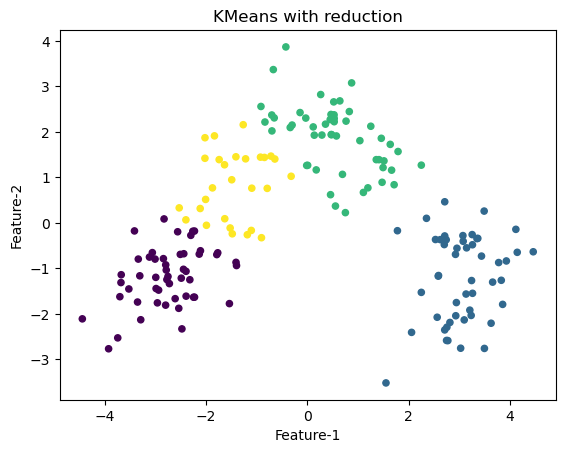

In [167]:
#with
km=KMeans(n_clusters=4)
km.fit(df2[[0,1]])
df2['km.labels_']=km.labels_
plt.scatter(df2[0],df2[1],s=20,c=df2['km.labels_'])
plt.title('KMeans with reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [170]:
silhouette_score(df2,df2['km.labels_'])

0.3513237822358171

Conclusion:-without feature reduction the silhouette_score is 0.2916026738013709 and with feature reduction the silhouette_score is 0.3513237822358171.
we are getting the highest silhouette_score in with feature reduction 0.3513237822358171.

# Task 4

# Apply the AAgglomerative Hierachical clustering algorithm to the prepared model and compare the performance of the model with and without dimension reduced data.

In [135]:
#without reduction
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,9):
    ag=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_ag=ag.fit_predict(df1)
    print(k,silhouette_score(df1,y_ag))

2 0.2917093910425583
3 0.3005913531964526
4 0.29660814676148517
5 0.24141094784846134
6 0.2450520411744691
7 0.24752646930736494
8 0.20928788869678955


The best k-value is k=3(0.3005)

In [136]:
ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ag=ag.fit_predict(df)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


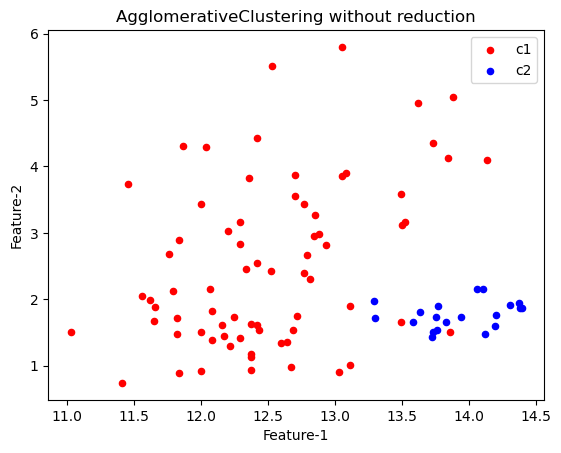

In [180]:
#df=df.to_numpy()
plt.scatter(df[y_ag==0,0],df[y_ag==0,1],c='r',s=20,label='c1')
plt.scatter(df[y_ag==1,0],df[y_ag==1,1],c='b',s=20,label='c2')
plt.title('AgglomerativeClustering without reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend();

In [138]:
#with reduction
for k in range(2,9):
    ag=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_ag=ag.fit_predict(df2)
    print(k,silhouette_score(df2,y_ag))

2 0.343718526637789
3 0.3631387389789706
4 0.37944206099472405
5 0.31921286091360324
6 0.2724544384775448
7 0.260380781514255
8 0.26745996660224874


In [149]:
ag=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_ag=ag.fit_predict(df)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


The best k-value is k=4(0.37944)

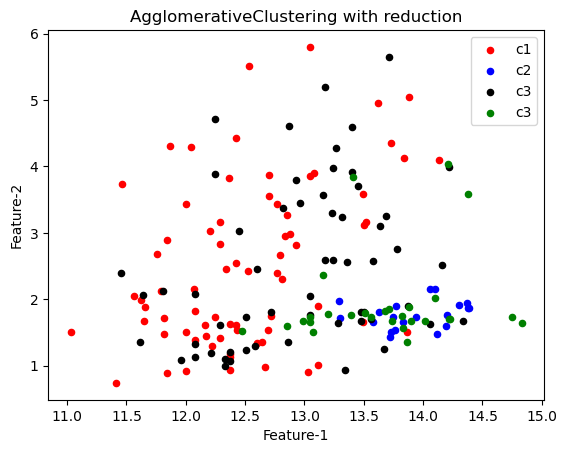

In [182]:
plt.scatter(df[y_ag==0,0],df[y_ag==0,1],c='r',s=20,label='c1')
plt.scatter(df[y_ag==1,0],df[y_ag==1,1],c='b',s=20,label='c2')
plt.scatter(df[y_ag==2,0],df[y_ag==2,1],c='k',s=20,label='c3')
plt.scatter(df[y_ag==3,0],df[y_ag==3,1],c='g',s=20,label='c3')
plt.title('AgglomerativeClustering with reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend();

Conclusion:-without feature reduction of AgglomerativeClustering is k=3(0.3005913531964526) and with feature reduction of AgglomerativeClustering  is k=4(0.37944206099472405).
we are getting the highest silhouette_score in with feature reduction is k=4(0.37944206099472405).

# Task 5

# Apply the DBSCAN clustering algorithm to the prepared model and compare the performance of the model with and without dimension reduction data.

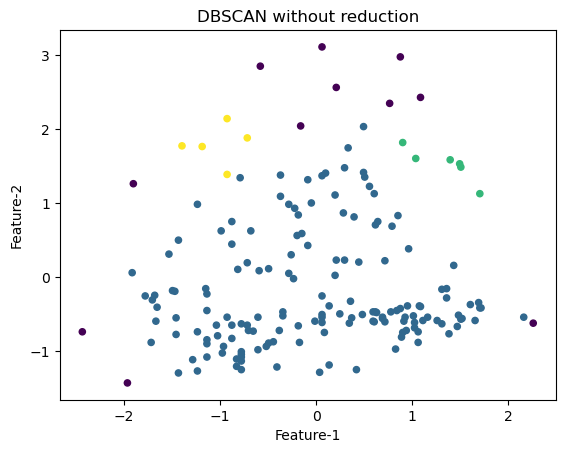

In [194]:
#without reduction
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(df1[[0,1]])
df1['dbscan.labels']=dbscan.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['dbscan.labels'])
plt.title('DBSCAN without reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [195]:
silhouette_score(df1,df1['dbscan.labels'])

0.0443980137886292

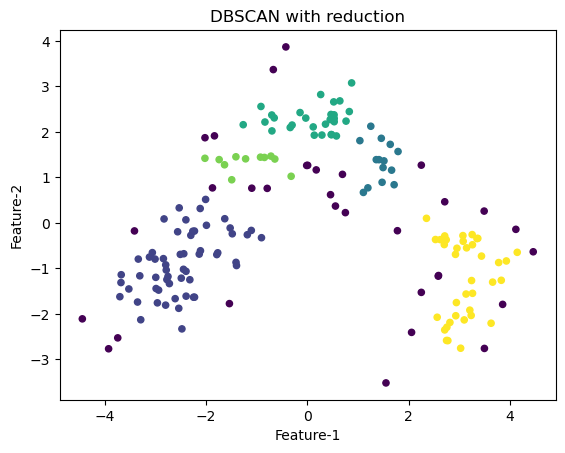

In [196]:
#with reduction
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(df2[[0,1]])
df2['dbscan.labels']=dbscan.labels_
plt.scatter(df2[0],df2[1],s=20,c=df2['dbscan.labels'])
plt.title('DBSCAN with reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [191]:
silhouette_score(df2,df2['dbscan.labels'])

0.26914948622533985

Conclusion:-without feature reduction the silhouette_score is 0.0443980137886292 and with feature reduction the silhouette_score is 0.26914948622533985.
we are getting the highest silhouette_score in without feature reduction 0.0443980137886292.

# Finally, propose your best model with the explation.

KMeans=we are getting the highest silhouette_score in with feature reduction 0.3513237822358171.
AgglomerativeClustering=we are getting the highest silhouette_score in with feature reduction is k=4(0.37944206099472405).
DBSCAN=we are getting the highest silhouette_score in without feature reduction 0.0443980137886292.